# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [5]:
def amplitude(array):
    return array.max() - array.min()

In [6]:
munRes = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI']]
#munRes.isna().sum()
munRes = munRes.dropna()
munRes.isna().sum()
munRes['DifIdade'] = munRes['IDADEMAE'] - munRes['IDADEPAI']
munRes.groupby('munResNome').agg({'IDADEMAE':'mean','IDADEPAI':'mean','DifIdade':'median'}).sort_values(by='DifIdade')

,IDADEMAE,IDADEPAI,DifIdade
munResNome,,,
Itapuã do Oeste,31.375000,42.500000,-10.0
Vale do Anari,27.133333,34.000000,-6.0
Seringueiras,25.058824,30.500000,-5.5
Parecis,26.973684,32.473684,-5.0
São Felipe D'Oeste,26.979167,31.395833,-5.0
Ministro Andreazza,27.890411,33.849315,-5.0
Nova Mamoré,26.051282,31.692308,-5.0
Campo Novo de Rondônia,24.900000,30.500000,-5.0
Monte Negro,27.642857,34.678571,-4.5


Podemos observar que quando se trata de diferença de idade entre os pais e mães, o municipio de Itapuã do Oeste tem a maior variação, sendo que a mediana dessa difreneça é de 10 anos entre o pai e a mãe

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

<Axes: xlabel='ESCMAE'>

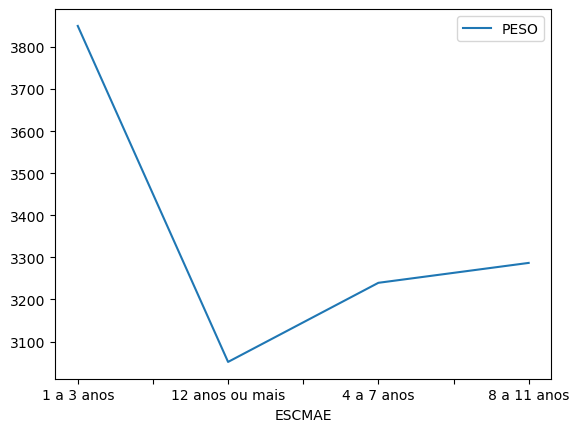

In [7]:
sinasc_2 = sinasc_raw[['DTNASC','PESO','ESCMAE']].copy()
sinasc_2['DTNASC'] = pd.to_datetime(sinasc_2['DTNASC'], errors='coerce')
sinasc_2 = sinasc_2.loc[(sinasc_2['DTNASC'].dt.day == 9) & (sinasc_2['DTNASC'].dt.month == 10)]
sinasc_2.groupby('ESCMAE')['PESO'].mean().to_frame().plot()

Considerando o dia 09/10, os recém nascidos com maior média de peso, foram em cenários onde a mãe tinha uma escolaridade mais baixa, um dia atipico se formos analisar o cenário no geral, onde quanto mairo a escolaridade da mãe, maior o peso do bebe

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [8]:
agrupado = sinasc_raw.groupby('munResNome')[['ORIGEM','IDADEMAE','IDADEPAI']].agg({
    'ORIGEM':'count',
    'IDADEMAE':['mean','max','min'],
    'IDADEPAI':['mean','max','min']
})
agrupado = agrupado.sort_values(('ORIGEM', 'count'))
agrupado

ORIGEM   IDADEMAE           IDADEPAI            
                           count       mean max min       mean   max   min
munResNome                                                                
Município ignorado - RO        1  24.000000  24  24  22.000000  22.0  22.0
Castanheiras                  32  27.281250  39  17  30.392857  43.0  17.0
Pimenteiras do Oeste          40  25.075000  40  14  35.600000  45.0  25.0
Primavera de Rondônia         43  27.023256  39  16  31.888889  44.0  21.0
Parecis                       44  26.454545  41  16  32.473684  61.0  18.0
Rio Crespo                    50  26.660000  39  16  28.000000  28.0  28.0
São Felipe D'Oeste            54  26.481481  41  17  31.395833  57.0  18.0
Teixeirópolis                 64  26.031250  39  16  31.500000  67.0  20.0
Cacaulândia                   75  25.546667  42  16  36.333333  50.0  28.0
Cabixi                        80  26.037500  39  13  34.333333  47.0  19.0
Vale do Paraíso               81  25.679012  52  14  29.976744  51.0  18.0
Ministro Andreazza            84  27.904762  44  17  33.849315  55.0  21.0
Vale do Anari                 93  26.096774  44  14  34.000000  58.0  23.0
Theobroma                     97  25.536082  42  15  30.083333  45.0  23.0
Novo Horizonte do Oeste       98  26.938776  41  15  31.588235  56.0  20.0
Santa Luzia D'Oeste           99  26.121212  41  15  30.703297  53.0  18.0
Nova União                   104  26.894231  39  16  31.371429  53.0  18.0
Itapuã do Oeste              109  26.064220  46  15  42.500000  73.0  25.0
Governador Jorge Teixeira    112  24.401786  41  13  29.222222  37.0  22.0
Corumbiara                   127  24.716535  43  15  32.470588  52.0  21.0
Alto Alegre dos Parecis      154  24.844156  41  14  29.179104  50.0  16.0
Chupinguaia                  162  25.333333  42  13  29.629630  46.0  20.0
Mirante da Serra             164  26.304878  46  14  32.154762  56.0  20.0
Campo Novo de Rondônia       166  24.825301  40  13  30.500000  40.0  21.0
Seringueiras                 168  24.910714  42  14  30.500000  47.0  20.0
Urupá                        170  26.688235  43  15  31.008929  48.0  17.0
Monte Negro                  199  25.648241  40  14  34.678571  55.0  20.0
Cujubim                      205  24.482927  42  14  31.400000  44.0  19.0
Alvorada D'Oeste             205  25.770732  44  15  30.757282  52.0  17.0
Colorado do Oeste            214  27.602804  47  15  34.354839  53.0  23.0
Alto Paraíso                 226  24.960177  42  11  28.833333  49.0  21.0
Costa Marques                233  24.412017  41  12  30.613636  60.0  17.0
Cerejeiras                   237  27.240506  53  15  31.652778  52.0  19.0
Nova Brasilândia D'Oeste     261  26.222222  51  15  30.520833  48.0  20.0
São Francisco do Guaporé     303  25.660066  41  14  31.638889  54.0  19.0
Presidente Médici            304  25.796053  44  14  30.150754  64.0  16.0
Candeias do Jamari           337  25.243323  45  14  29.894737  41.0  21.0
São Miguel do Guaporé        353  25.926346  42  14  32.666667  60.0  19.0
Alta Floresta D'Oeste        367  25.991826  53  14  29.548701  58.0  17.0
Nova Mamoré                  432  25.326389  46  14  31.692308  43.0  19.0
Espigão D'Oeste              450  26.093333  44  14  31.198113  86.0  16.0
Machadinho D'Oeste           500  25.480000  44  13  31.326923  53.0  17.0
Buritis                      583  25.559177  44  14  30.812500  49.0  18.0
Pimenta Bueno                616  25.199675  47  13  29.745174  70.0  16.0
Ouro Preto do Oeste          631  26.375594  44  14  31.233244  60.0  17.0
Guajará-Mirim                781  25.462228  43  13  30.470588  44.0  19.0
Jaru                         881  25.982974  45  12  32.197183  62.0  19.0
Rolim de Moura               927  26.600863  44  14  30.360479  69.0  16.0
Cacoal                      1374  26.890102  47  14  30.931854  66.0  17.0
Vilhena                     1590  26.433962  46  14  34.152941  60.0  18.0
Ariquemes                   1729  25.607866  44  13

O municipio onde menos tiveram nascimentos em 2019 foi o municipio de Castanheiras, com 32 nascimentos, e a idade média das mães nessa região é de 27 anos, com a máxima de 39 e minima de 17, enquanto os pais tem uma média de 30 anos, com a maxima em 43 e a min em 17

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [11]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [33]:
agrupado = sinasc_raw[['munResNome','DTNASC','QTDFILVIVO','IDADEPAI']].copy()
agrupado['DTNASC'] = pd.to_datetime(agrupado['DTNASC'])
agrupado = agrupado.loc[agrupado['DTNASC'].dt.month == 3]
agrupado = agrupado.dropna()
agrupado = agrupado.groupby('munResNome').agg({'DTNASC':'count','QTDFILVIVO':['mean','max','min'],'IDADEPAI':['mean','max','min']})
agrupado.sort_values(('DTNASC','count'),ascending=False)


DTNASC QTDFILVIVO             IDADEPAI            
                          count       mean  max  min       mean   max   min
munResNome                                                                 
Cacoal                      122   0.926230  7.0  0.0  30.008197  47.0  17.0
Ji-Paraná                    95   0.705263  4.0  0.0  30.831579  56.0  16.0
Rolim de Moura               66   0.712121  5.0  0.0  31.257576  50.0  19.0
Pimenta Bueno                54   0.870370  4.0  0.0  29.611111  49.0  17.0
Porto Velho                  48   1.479167  6.0  0.0  35.750000  62.0  19.0
Ouro Preto do Oeste          40   0.800000  2.0  0.0  30.175000  57.0  19.0
Espigão D'Oeste              30   1.100000  4.0  0.0  30.666667  56.0  19.0
Alta Floresta D'Oeste        24   0.875000  4.0  0.0  30.125000  45.0  20.0
Vilhena                      16   0.687500  2.0  0.0  33.562500  47.0  27.0
Buritis                      15   1.533333  3.0  1.0  35.466667  48.0  24.0
Presidente Médici            14   0.928571  3.0  0.0  32.928571  60.0  24.0
Urupá                        13   1.000000  2.0  0.0  30.230769  47.0  22.0
Machadinho D'Oeste           13   0.769231  1.0  0.0  32.000000  40.0  23.0
Alvorada D'Oeste             10   1.200000  3.0  0.0  33.400000  42.0  26.0
Alto Alegre dos Parecis       9   0.888889  2.0  0.0  29.222222  38.0  21.0
Jaru                          9   1.111111  3.0  0.0  34.888889  41.0  28.0
Cerejeiras                    9   1.111111  2.0  0.0  31.222222  40.0  26.0
Nova Mamoré                   9   1.666667  4.0  0.0  31.666667  43.0  20.0
Santa Luzia D'Oeste           7   0.428571  2.0  0.0  27.142857  37.0  19.0
Monte Negro                   6   0.500000  1.0  0.0  35.000000  55.0  22.0
Vale do Paraíso               6   0.500000  2.0  0.0  30.000000  46.0  19.0
Ministro Andreazza            6   1.166667  3.0  0.0  38.000000  47.0  27.0
Parecis                       5   1.800000  5.0  1.0  30.000000  40.0  24.0
Novo Horizonte do Oeste       5   1.200000  2.0  1.0  30.400000  36.0  24.0
Chupinguaia                   5   0.400000  1.0  0.0  29.000000  37.0  20.0
Castanheiras                  4   1.750000  3.0  1.0  36.000000  42.0  32.0
Primavera de Rondônia         4   1.250000  2.0  0.0  32.750000  35.0  27.0
Colorado do Oeste             4   1.500000  2.0  1.0  38.750000  53.0  27.0
São Felipe D'Oeste            4   0.000000  0.0  0.0  29.250000  32.0  27.0
Vale do Anari                 3   1.333333  2.0  0.0  32.000000  34.0  30.0
Teixeirópolis                 3   0.333333  1.0  0.0  27.000000  32.0  22.0
São Miguel do Guaporé         3   2.000000  4.0  0.0  33.666667  39.0  30.0
Seringueiras                  3   0.666667  2.0  0.0  30.333333  34.0  26.0
Nova Brasilândia D'Oeste      3   0.666667  1.0  0.0  29.666667  35.0  25.0
Campo Novo de Rondônia        3   1.333333  2.0  1.0  30.000000  37.0  25.0
Nova União                    3   1.000000  1.0  1.0  27.333333  29.0  26.0
Alto Paraíso                  2   1.500000  2.0  1.0  26.000000  29.0  23.0
Mirante da Serra              2   0.500000  1.0  0.0  31.000000  32.0  30.0
Costa Marques                 2   0.500000  1.0  0.0  25.000000  31.0  19.0
São Francisco do Guaporé      2   0.000000  0.0  0.0  29.500000  40.0  19.0
Ariquemes                     2   0.500000  1.0  0.0  29.000000  29.0  29.0
Theobroma                     2   1.000000  2.0  0.0  28.500000  31.0  26.0
Cujubim                       1   2.000000  2.0  2.0  39.000000  39.0  39.0
Candeias do Jamari            1   1.000000  1.0  1.0  25.000000  25.0  25.0
Itapuã do Oeste               1   2.000000  2.0  2.0  39.000000  39.0  39.0
Corumbiara                    1   2.000000  2.0  2.0  37.000000  37.0  37.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [35]:
sinasc_raw.select_dtypes(exclude=['int64','float64']).head(5)

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')